# Kaiden Merchant

## Revised Research Questions 

**Are there unique airlines that consistently see higher numbers of delayed flights relative to total flights flown?**
- I would first create a data table that only contains the airline code and the DEP_DEL15 column that contains whether the airplane left late.
- Next, I would use groupby and groupby the airline code and take the sum of the DEP_DEL15 column to figure out how many delays each airline had over the month of january
- To make sure we don't have bias for the smaller airlines, I would also find out how many total flights were flown by that airline and create a column for the proportion of delayed flights over the total flights.

**Do planes flying out of California see more delays than plans flying out of Illinois? (based on the 3 busiest airports in the state) -- I can also include more airports for a larger sample size**
- Create a data frame with only the 6 airports (3 from each state).
- Then, create a new column that specifies which state that airport is in.
- then, I can use a groupby function that groups by the state and sums up how many delays there were in each state
- Again, I don't want bias to the airports that send out a fewer amount of planes so I would also create a probability column that takes into account the total flights as well.

**Did declaring a health emergency have any effect on flight delays in the United States?**
- The HHS declared a health emergency at the end of January in 2020. I would like to look at February or March 2020 to see if the proportion of delayed flights was effected by COVID.
- It would also be interesting to see the difference in the amount of flights/routes that had to be cancelled because of the pandemic and the lack of passengers. 
- ^^ I can make this a completely different question

- Load in the dataset from March 2020 and create a data frame that looks at the number of delays per day in the month of March.
- Then I will create a new column that calculates the probability of a delayed departure flight by number_of_delays/total_flights
- It would be interesting to see a visualization where I can have two lines, one for january 2020 and one for march 2020 to see if the public health emergency effected the chance of having a delayed flight. (this can be a lineplot)
- I would have to create one data frame that contains the two months probabilities so I can achieve this visualization which I think would be useful in determining whether the two months had a statistical difference in probabilities.
- I can go further and look at the residual plots to see if linear models are a good fit for predicting the probability of a delayed departure flight on any given day (between the two months).






## Original Research Questions

**Is there a way for passengers to plan out their trips in order to reduce flight delays in the month of January? Have flight delays gotten worse/better during the peak-pandemic time period? Does flights taking off from California see more flight delays than flights out of Illinois? Are there specific airlines that yield the most delays?**

*First Question*

- Firstly, I would like to look at days of the week (mon, tues, etc.) and analyze the number of delays on each day of the week throughout the month.  
A bar chart may be useful for this sort of analysis because we are comparing number of delays vs. the day of the week and can be used to conclude whether certain days see more delays than others.

- Secondly, with the same sort of analysis, I would split the month into three sections (early (1-10), middle (11-20), late (21-31)) and figure out which section of the month seems to yield the most delays throughout the country.

*Second Question*
- If possible, I would like to look at a dataset from January 2019 and Febraury 2019 and compare with the same datasets from January 2020 and February 2020
This is when the US declared public health emergency (Feb 2020) and can loot at number (or proportion) of delays vs. total flights so we can determine if COVID had an effect on flight delays 

I can also dive deeper and look at certain sections of the month like I did above and see if certain sections of the month saw more flight delays as a result of COVID

*Third Question*

This question is interesting to me since I am from Chicago and now live in California and it would be interesting to look at the 3 busiest airports from those states and compare whether one state sees more flight delays than the other.

- I would create a dataset that only tracks the airports in CA (LAX, SFO, SAN) and IL (ORD, MDW, MLI) and looks at the delays from each airport
It would be interesting to see if the busiest airports in the state (LAX and ORD) would yield more delays (by percentage of delays from total flights) than the 3rd busiest airport

Another comparison would be to combine the delays from the CA airports and the IL airports and compare which state has to deal with more delays.

*Fourth Question*

This is an interesting question and many times, you will hear people complain about how one airline is much worse than the others when talking about flight delays...However, are there really specific airlines that tend to have the most delays?

- First, I would create a dataset that counts the number of delays in the month for each airline.
- Then, a pie chart that will show the airline that contributes the most percentage of delays in the month of January (however one flaw is that it does not take into account which airline flies more, since that airline will of course, have more delays)

- Using some sort of bar graph variation, I can show the percentage of total flights that were delayed for each airline which may be more useful to determine which airline frequently has delays.




## Load Modules

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

## Load Dataset

In [ ]:
raw_df = pd.read_csv('../data/raw/Jan_2020_ontime.csv')
raw_df.tail()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN
607345,31,5,9E,20363,9E,N228PQ,4815,15919,1591904,XNA,...,ATL,1841.0,0.0,1800-1859,2128.0,0.0,0.0,0.0,589.0,NaN


In [ ]:
raw_df.describe()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,607346.000000,607346.000000,607346.000000,607346.000000,607346.000000,6.073460e+05,607346.000000,6.073460e+05,600682.000000,600647.000000,600271.000000,599268.000000,607346.000000,607346.000000,607346.000000,0.0
mean,16.014354,3.955735,19994.137492,2622.365261,12657.389167,1.265743e+06,12657.196320,1.265724e+06,1331.512559,0.136326,1477.968924,0.137309,0.011407,0.001893,798.022341,NaN
std,8.990719,1.910205,375.754232,1822.545302,1524.407203,1.524405e+05,1524.279269,1.524277e+05,497.095168,0.343135,525.543294,0.344174,0.106193,0.043473,587.282639,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013506e+06,10135.000000,1.013506e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,1070.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,919.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,369.000000,NaN
50%,16.000000,4.000000,19977.000000,2177.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1326.000000,0.000000,1513.000000,0.000000,0.000000,0.000000,641.000000,NaN
75%,24.000000,5.000000,20378.000000,4108.000000,14027.000000,1.402702e+06,14027.000000,1.402702e+06,1739.000000,0.000000,1918.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,6860.000000,16869.000000,1.686901e+06,16869.000000,1.686901e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,5095.000000,NaN


<seaborn.axisgrid.FacetGrid>

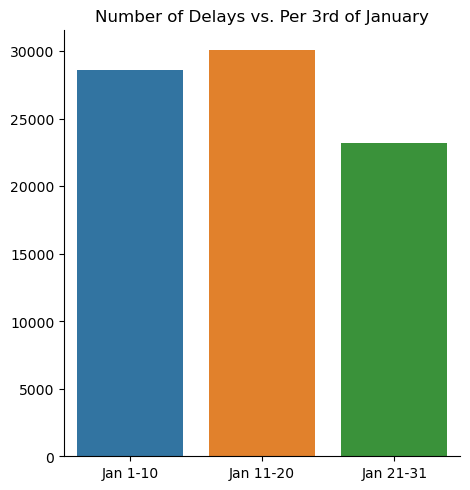

In [ ]:
#Analyzing whether the early, middle, or late part of the month sees a higher number of delays realtive to the rest of the month

filtered = raw_df[['DAY_OF_MONTH', 'DEP_DEL15']]
early = filtered.loc[filtered['DAY_OF_MONTH']<=10,] 
early = early.assign(PART_OF_MONTH='Jan 1-10')
middle = filtered.loc[(filtered['DAY_OF_MONTH']<=20) & (filtered['DAY_OF_MONTH']>10),] 
middle = middle.assign(PART_OF_MONTH='Jan 11-20')
late = filtered.loc[filtered['DAY_OF_MONTH']>20,] 
late = late.assign(PART_OF_MONTH='Jan 21-31')
# Created data frame with a new column that specifies if the observation is in the early, middle, or late part of the month
filtered_by_month = pd.concat([early, middle, late])

#we have to drop the na values of the dep_del15 column since we are looking at the departure delay for each part of the month
filtered_by_month = filtered_by_month.dropna()

#Now we use groupby to create a data frame that shows how many departure delays over 15 minutes there were in each section of the month
month_grouped = filtered_by_month.groupby('PART_OF_MONTH')['DEP_DEL15'].sum().reset_index()
month_grouped = month_grouped.rename(columns={'DEP_DEL15':'Number_of_delays'})
month_grouped.head()

barplot = sns.catplot(data = month_grouped, kind='bar', x='PART_OF_MONTH', y='Number_of_delays', order = ['Jan 1-10','Jan 11-20','Jan 21-31'])
barplot.set(xlabel='',
           ylabel='',
           title='Number of Delays vs. Per 3rd of January')



This first visualization is very basic but it along with the data frame allows us a sneak peek at how many delays are in each section of the month.
However, this may not be as useful since we don't know how many total flights there were for each of the sections. In the next part of the EDA I will dive deeper
to find out if the probability of departing late has a significant difference in for each day, grouped by section of the month

In [ ]:
filtered.head()

,DAY_OF_MONTH,DEP_DEL15
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0


[Text(0, 0.5, 'Probability of Delay'),
 Text(0.5, 0, 'Day of the Month'),
 Text(0.5, 1.0, 'Probability of Delay for Each Day of January')]

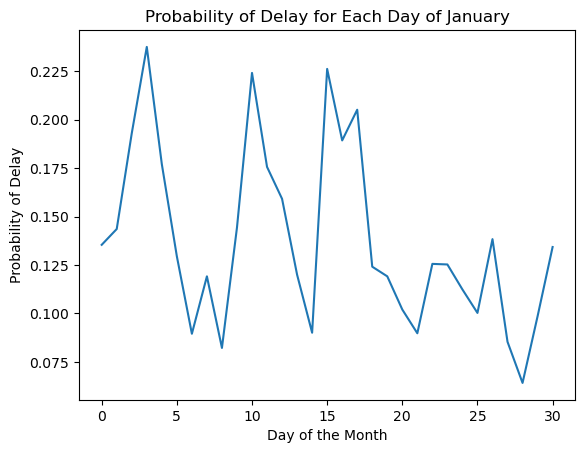

In [ ]:
#create data frame that is grouped by day and shows number of delays per day

"""
First we use groupby to group by the day of the month and then find the sum which returns the number of delays for each day
I also took advantage of method chaining here and renamed the columns just to make it more convenient 
"""
filtered = filtered.dropna()
grouped_by_day = filtered.groupby('DAY_OF_MONTH', as_index=False).sum().rename(columns={'DEP_DEL15':'Number_of_delays'}).reset_index(drop=True)
grouped_by_day
#next, I want to look at the probability of delay for each day in the month by utilizing the number of delays and dividing it by the total number of flights for each day
total_days = filtered.groupby('DAY_OF_MONTH').count()['DEP_DEL15'].reset_index(drop=True)
grouped_by_day['P(Delay)'] = (grouped_by_day['Number_of_delays'])/(total_days)

probability_line_graph = sns.lineplot(grouped_by_day['P(Delay)'])
probability_line_graph.set(ylabel='Probability of Delay',
                          xlabel='Day of the Month',
                          title='Probability of Delay for Each Day of January')

We can see multiple large spikes of the proportion of delays and interestingly enough, it happens in the early and middle parts of the month. This corresponds with the previous visualization since the early and middle parts of the month had the higher number of delays. However, I think I can dive a little deeper and look at the overall average probability of a delay for the whole month an then analyze the residuals in a residplot for each day. This can provide insight on which days are outliers for producing delayed departure flights.

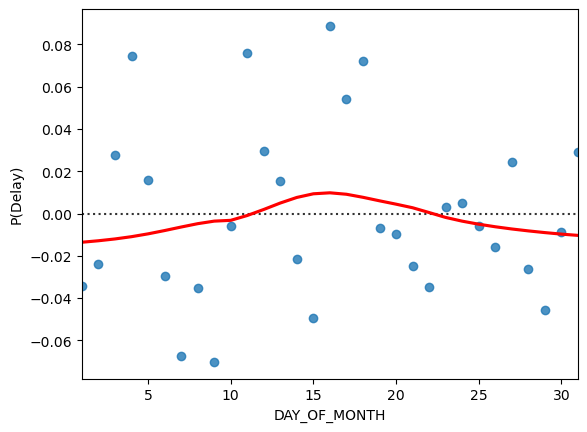

In [ ]:
"""
Here, I am interested in looking at a residual plot. After making the above plot, I think I can utilize a residual plot
to gain more information on the probabilities of having a delayed departure. Information from a residual plot can reveal 
information that could be useful when trying to create a linear model (or determining whether a linear model is the best fit)
"""

resid_plot = sns.residplot(data = grouped_by_day, x='DAY_OF_MONTH', y='P(Delay)',  lowess = True, line_kws=dict(color="r"))



When interpreting a residual plot, we look for a structure or pattern. If there is a pattern, then a linear model isn't the best fit for creating a model. In this case, we actually see a relatively random scatter of points on this residual plot meaning that a linear fit may be a good model for regression. This means that it may be simple to create a model that can predict the probability of a departure delay for a certain day